In [1]:
#getting data ready
import pandas as pd
import numpy as np
import matplotlib as plt
heart_disease=pd.read_csv("Datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#feature matrix (x,y)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [3]:
#choosing the right model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [5]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [6]:
y_preds=clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [7]:
clf.score(x_train,y_train) 

1.0

In [8]:
clf.score(x_test,y_test)

0.8032786885245902

## 1. Getting our data ready to be used with machine learning models
Three main things we have to do:
1. Split the data into features and labels (usually `x` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. converting non numerical values into numeric values (also called feature encoding)

### 1.1 But first we need our data to be all Numerical.

In [9]:
car_sales=pd.read_csv("Datasets/car-sales-extended.csv")
car_sales["Price"].dtype

dtype('int64')

In [10]:
#splitting x and y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [11]:
# converting categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categories)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)

In [12]:
#pd.DataFrame(transformed_x)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
model.score(x_test,y_test)

0.2875952006928184

### 1.2 Handling missing values in data
1. By replacing it with mean(imputing)
2. By removing rows with missing data 

In [15]:
car_sales_missing=pd.read_csv("Datasets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [16]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### option 1: Filling missing values with pandas

In [17]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)


In [18]:
car_sales_missing.dropna(inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [21]:
categories=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categories)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [22]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2: Fill missing values with sklearn

In [23]:
car_sales_missing=pd.read_csv("Datasets/car-sales-extended-missing-data.csv")
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [24]:
#splitting into training and test sets
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


#creating imputers
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Defining columns
categories=["Make","Colour"]
doors=["Doors"]
nums=["Odometer (KM)"]

#transforming 
transformer=ColumnTransformer([("cat_imputer",cat_imputer,categories),("door_imputer",door_imputer,doors),("num_imputer",num_imputer,nums)],remainder="passthrough")

#fitting
x_train_filled=transformer.fit_transform(x_train)
x_test_filled=transformer.fit_transform(x_test)

In [26]:
x_train_df=pd.DataFrame(x_train_filled,columns=["Make","Colour","Doors","Odometer (KM)"])
x_test_df=pd.DataFrame(x_test_filled,columns=["Make","Colour","Doors","Odometer (KM)"])

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categories=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categories)],remainder="passthrough")
transformed_x_train=transformer.fit_transform(x_train_df)
transformed_x_test=transformer.fit_transform(x_test_df)

In [28]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(transformed_x_train,y_train)

RandomForestRegressor()

In [29]:
model.score(transformed_x_test,y_test)

0.28928132400047135

## 2. Choosing the Right model/estimator

<img src="images/ml_map.png" />

In [30]:

from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [31]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.svm import SVR

model=SVR()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.00697953123230266

In [36]:
from sklearn.linear_model import Ridge

model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.60668008735411

In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8108864239460771

### 2.2 chosing an Estimator for lassification problem

In [38]:
heart_disease=pd.read_csv("Datasets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.819672131147541

##### <b>Note:&nbsp;</b> If you have Structured Data, Ensemnle models will work Great.

## 3. Fit the model and use it to make Predictions
### 3.1 Fitting the model

already did it a couple of times, It just finds patterns in our training data

### 3.2 Making predictions on unseen data using the model

##### 2 ways of doing so:
1. `predict()`: will give you a single lable for each sample.(1 or 0).
2. `predict_proba()`: will give the probabiliies of being 1 or 0.

In [42]:
#Using predict()
y_preds=model.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [43]:
a=np.mean(y_preds==y_test)
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,y_preds)
a,b


(0.819672131147541, 0.819672131147541)

In [44]:
#using predict proba
model.predict_proba(x_test)

array([[0.45, 0.55],
       [0.13, 0.87],
       [0.98, 0.02],
       [0.4 , 0.6 ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.19, 0.81],
       [0.97, 0.03],
       [0.11, 0.89],
       [0.45, 0.55],
       [0.3 , 0.7 ],
       [0.08, 0.92],
       [0.64, 0.36],
       [0.34, 0.66],
       [0.13, 0.87],
       [0.05, 0.95],
       [0.84, 0.16],
       [0.43, 0.57],
       [0.31, 0.69],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.81, 0.19],
       [0.54, 0.46],
       [0.23, 0.77],
       [0.99, 0.01],
       [0.63, 0.37],
       [0.91, 0.09],
       [0.18, 0.82],
       [0.05, 0.95],
       [0.11, 0.89],
       [0.63, 0.37],
       [0.37, 0.63],
       [0.94, 0.06],
       [0.34, 0.66],
       [0.54, 0.46],
       [0.84, 0.16],
       [0.3 , 0.7 ],
       [0.05, 0.95],
       [0.08, 0.92],
       [0.36, 0.64],
       [0.66, 0.34],
       [0.94, 0.06],
       [0.08, 0.92],
       [0.18, 0.82],
       [0.28, 0.72],
       [0.9 , 0.1 ],
       [0.09,

## 4. Evaluating Our Model

cross validation score
<img src="images/cross-val.png" />

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y)

array([0.83606557, 0.90163934, 0.85245902, 0.78333333, 0.78333333])

### 4.2 Classification model Evaluation Metrics
1. Accuracy (`score`,`cros_val_score`)
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

In [46]:
# making a classification model again just to avoid inconsistencies
heart_disease=pd.read_csv("Datasets/heart-disease.csv")
heart_disease.head()

# seperating x and y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

#### 4.2.2 Area under the reciever operating curve (AUC/ROC)
* Area under curve
* ROC curve

<b>ROC curves are a comparision of a model's true possitive rate(tpr) v/s a model's false possitive rate(fpr)</b>

* True Positive=Model predicts 1 when truth is 1
* False Positive=Model predicts 1 when truth is 0
* True Negetive=Model predicts 0 when truth is 0
* False Negetive=Model predicts 0 when truth is 1

In [47]:
y_probs=model.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.4 , 0.6 ],
        [0.28, 0.72],
        [0.14, 0.86],
        [0.06, 0.94],
        [0.97, 0.03],
        [0.41, 0.59],
        [0.24, 0.76],
        [0.58, 0.42],
        [0.44, 0.56],
        [0.24, 0.76]]),
 61)

In [48]:
y_probs_possitive=y_probs[:,1]
y_probs_possitive[:10]

array([0.6 , 0.72, 0.86, 0.94, 0.03, 0.59, 0.76, 0.42, 0.56, 0.76])

In [49]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_probs_possitive)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


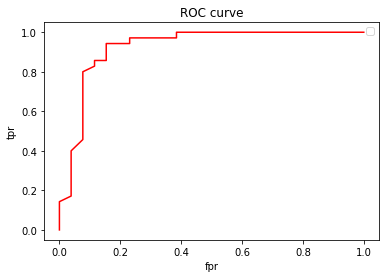

In [50]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr,color="red")

    #customizing the plot
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)



In [51]:
# AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_possitive)

0.9241758241758242

#### 4.2.3 Confusion Matrix
<img src="images/confusion matrix.png" />

In [52]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_test,y_preds)
conf_mat


array([[22,  4],
       [ 2, 33]])

<AxesSubplot:>

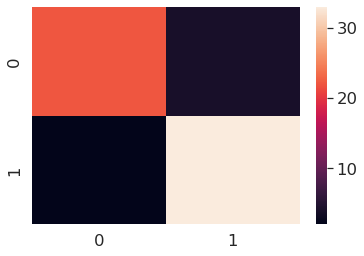

In [53]:
#visualizing confusion matrix using seaborn
import seaborn as sns

sns.set(font_scale=1.5)

sns.heatmap(conf_mat)

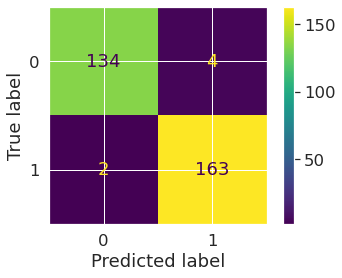

In [54]:
#Display using sklearn using estimator
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)


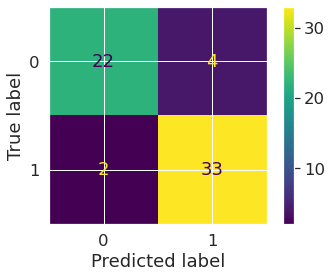

In [55]:
#Displaying confusion matrix using predictions
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)


#### 4.2.4 Classification Report

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



### 4.3 Evalusting Regression Model


Main topics: 
1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)


In [57]:
# creating a regression model
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

In [58]:
from sklearn.metrics import r2_score

r2_score(y_test,y_preds)

0.8203139902687966

In [59]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_preds)
mae

0.3137523172238374

In [60]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
mse

0.2334999851585821

### Finally using scoring parameter

In [61]:
# making a classification model again just to avoid inconsistencies
heart_disease=pd.read_csv("Datasets/heart-disease.csv")
heart_disease.head()

# seperating x and y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

In [62]:
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(model,x,y,scoring="accuracy")
np.mean(cv_acc)

0.8282513661202187

In [63]:
cv_recall=cross_val_score(model,x,y,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [64]:
cv_prec=cross_val_score(model,x,y,scoring="precision")
np.mean(cv_prec)

0.8250537634408601

## 5. Tuning Hyper Parameters

In [65]:

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparams by hand

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_test,y_preds):
    accuracy=accuracy_score(y_test,y_preds)
    precision=precision_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds)
    f1=f1_score(y_test,y_preds)

    metric_dict={
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)

    }
    return metric_dict


#### Shuffling data into 3 splits
<img src="images/Screenshot from 2022-02-13 14-43-42.png" />

In [67]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
#shuffling data
heart_disease_shuffled=heart_disease.sample(frac=1)

#splitting data into x&y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Gettinng ready to split
train_split=round(0.7*len(heart_disease_shuffled)) #getting the index of 70% data
valid_split= round(train_split+0.15*len(heart_disease_shuffled))# getting the index of 70 + 15% data

#splitting train,valid,test splits
x_train=x[:train_split]
y_train=y[:train_split]

x_valid=x[train_split:valid_split]
y_valid=y[train_split:valid_split]

x_test=x[valid_split:]
y_test=y[valid_split:]

base_model=RandomForestClassifier()
base_model.fit(x_train,y_train)


y_preds=base_model.predict(x_valid)

#evaluating
base_metrics=evaluate_preds(y_test[:-1],y_preds)
base_metrics

{'accuracy': 0.44, 'precision': 0.42, 'recall': 0.52, 'f1': 0.47}

In [69]:
model1=RandomForestClassifier(n_estimators=200)
model1.fit(x_train,y_train)


y_preds=model1.predict(x_valid)

#evaluating
base_metrics=evaluate_preds(y_test[:-1],y_preds)
base_metrics

{'accuracy': 0.44, 'precision': 0.43, 'recall': 0.57, 'f1': 0.49}

## 5.2 Hyperparameters tuning with Randomized search cv